In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import numpy as np

# === EGYSZERI STYLE BLOKK ===
fm.fontManager.addfont("/Users/macbookpro15/Desktop/Game model/Data analysis/Visualization/Fonts/Montserrat/Montserrat/static/Montserrat-Regular.ttf")
fm.fontManager.addfont("/Users/macbookpro15/Desktop/Game model/Data analysis/Visualization/Fonts/Montserrat/Montserrat/static/Montserrat-Bold.ttf")
plt.rcParams["font.family"] = "Montserrat"

BG = "#f7f4fb"
TEXT = "#231b2e"
MUTED = "#6e6e6e"
GRID = "#e8e1f2"
AXIS = "#bdb4cd"

monthly = pd.read_csv("../data/processed/monthly_metrics.csv")
monthly = monthly.sort_values("month").reset_index(drop=True)

def set_month_ticks(ax, every=2):
    idx = range(0, len(monthly), every)
    ax.set_xticks(list(idx))
    ax.set_xticklabels(monthly.loc[idx, "month"], rotation=45, ha="right")



In [19]:
def format_currency_axis(ax):
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:,.0f}"))

def format_count_axis(ax):
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:,.0f}"))


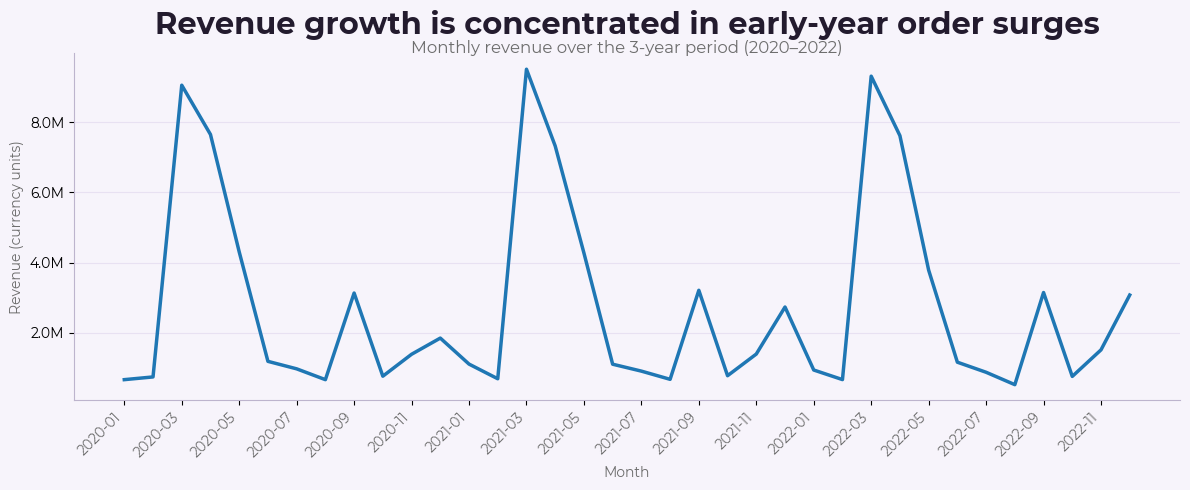

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

x = np.arange(len(monthly))
ax.plot(x, monthly["revenue"], linewidth=2.5)

ax.set_title("Revenue growth is concentrated in early-year order surges", fontsize=22, weight="bold", color=TEXT, pad=14)
ax.text(0.5, 1.00, "Monthly revenue over the 3-year period (2020–2022)",
        transform=ax.transAxes, ha="center", color=MUTED, fontsize=12)

ax.set_xlabel("Month", color=MUTED)
ax.set_ylabel("Revenue (currency units)", color=MUTED)

ax.grid(True, axis="y")
for gl in ax.get_ygridlines():
    gl.set_color(GRID)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(AXIS)
ax.spines["bottom"].set_color(AXIS)

ax.set_xticks(x[::2])
ax.set_xticklabels(monthly["month"].iloc[::2], rotation=45, ha="right", color=MUTED)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda v, pos: f"{v/1_000_000:.1f}M" if v >= 1_000_000 else (f"{v/1_000:.0f}K" if v >= 1_000 else f"{v:.0f}")
))

plt.tight_layout()
plt.savefig("../charts/revenue_over_time.png", dpi=300, bbox_inches="tight")
plt.show()



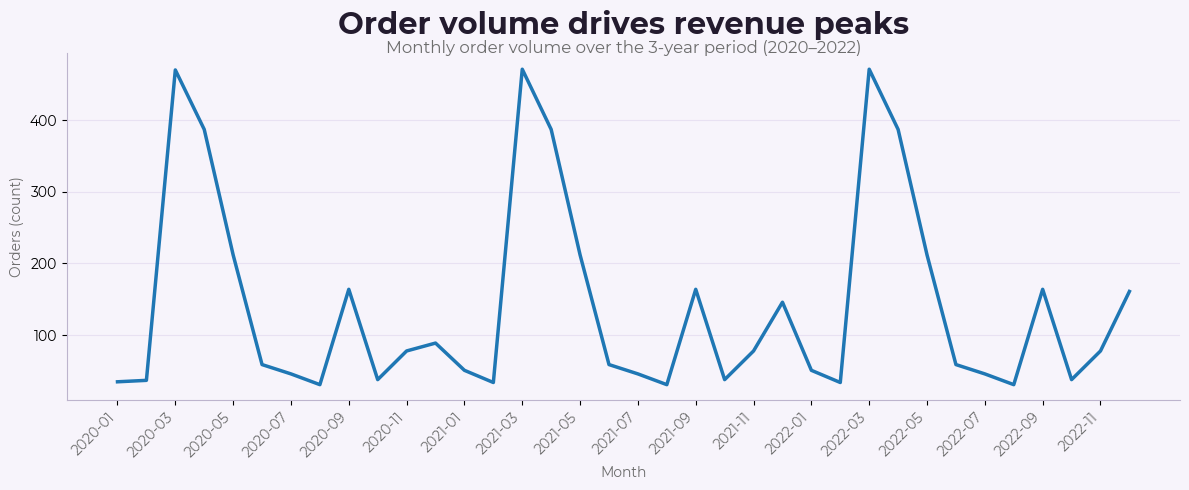

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

x = np.arange(len(monthly))
ax.plot(x, monthly["orders"], linewidth=2.5)

ax.set_title("Order volume drives revenue peaks", fontsize=22, weight="bold", color=TEXT, pad=14)
ax.text(0.5, 1.00, "Monthly order volume over the 3-year period (2020–2022)",
        transform=ax.transAxes, ha="center", color=MUTED, fontsize=12)

ax.set_xlabel("Month", color=MUTED)
ax.set_ylabel("Orders (count)", color=MUTED)

ax.grid(True, axis="y")
for gl in ax.get_ygridlines():
    gl.set_color(GRID)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(AXIS)
ax.spines["bottom"].set_color(AXIS)

ax.set_xticks(x[::2])
ax.set_xticklabels(monthly["month"].iloc[::2], rotation=45, ha="right", color=MUTED)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, pos: f"{v:,.0f}"))

plt.tight_layout()
plt.savefig("../charts/orders_over_time.png", dpi=300, bbox_inches="tight")
plt.show()



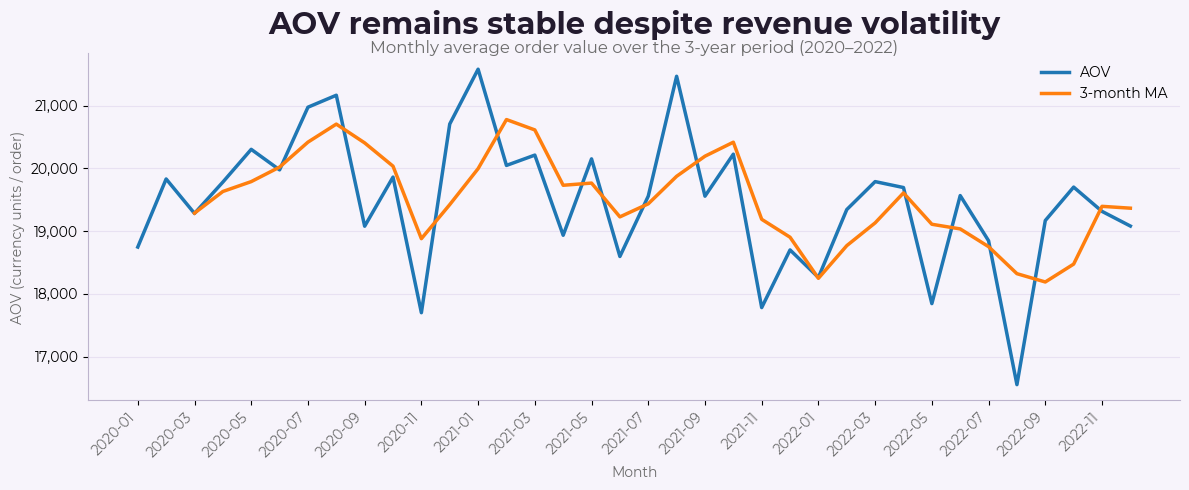

In [36]:
fig, ax = plt.subplots(figsize=(12,5))
fig.patch.set_facecolor(BG)
ax.set_facecolor(BG)

x = np.arange(len(monthly))
ax.plot(x, monthly["aov"], linewidth=2.5, label="AOV")

# opcionális simítás (szebb, kevésbé “ideges”)
aov_ma3 = monthly["aov"].rolling(3).mean()
ax.plot(x, aov_ma3, linewidth=2.5, label="3-month MA")

ax.set_title("AOV remains stable despite revenue volatility", fontsize=22, weight="bold", color=TEXT, pad=14)
ax.text(0.5, 1.00, "Monthly average order value over the 3-year period (2020–2022)",
        transform=ax.transAxes, ha="center", color=MUTED, fontsize=12)

ax.set_xlabel("Month", color=MUTED)
ax.set_ylabel("AOV (currency units / order)", color=MUTED)

ax.grid(True, axis="y")
for gl in ax.get_ygridlines():
    gl.set_color(GRID)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color(AXIS)
ax.spines["bottom"].set_color(AXIS)

ax.set_xticks(x[::2])
ax.set_xticklabels(monthly["month"].iloc[::2], rotation=45, ha="right", color=MUTED)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda v, pos: f"{v:,.0f}"))

ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("../charts/aov_over_time.png", dpi=300, bbox_inches="tight")
plt.show()

